**Table of contents**<a id='toc0_'></a>    
- [Greenwashing Detection](#toc1_)    
  - [Semantic Simularity](#toc1_1_)    
  - [Correctness](#toc1_2_)    
  - [Context relevancy](#toc1_3_)    
  - [Faithfulness](#toc1_4_)    
- [Greenwashing Mitigation](#toc2_)    
  - [Semantic Simularity](#toc2_1_)    
  - [Correctness](#toc2_2_)    
  - [Context relevancy](#toc2_3_)    
  - [Faithfulness](#toc2_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# <a id='toc1_'></a>[Greenwashing Detection](#toc0_)

In [193]:
llama3_zara = pd.read_excel('./data/zara_llama3_instruct_topk8_paramsall.xlsx')
llama3_zara.drop('Unnamed: 0', axis=1, inplace=True)
llama3_zara =llama3_zara.iloc[0:9]

llama2_zara = pd.read_excel('./data/scenarios_zara_llama2_topk8_paramsall.xlsx')
llama2_zara.drop('Unnamed: 0', axis=1, inplace=True)
llama2_zara = llama2_zara.iloc[0:9]

mistral_zara = pd.read_excel('./data/scenarios_zara_mistral_topk8_paramsall.xlsx')
mistral_zara.drop('Unnamed: 0', axis=1, inplace=True)
mistral_zara = mistral_zara.iloc[0:9]

phi3_zara = pd.read_excel('./data/scenarios_zara_phi3_14b-instruct_topk8_paramsall.xlsx')
phi3_zara.drop('Unnamed: 0', axis=1, inplace=True)
phi3_zara = phi3_zara.iloc[0:9]

llama3_hm = pd.read_excel('./data/scenarios_hm_llama3_instruct_topk8_paramsall.xlsx')
llama3_hm.drop('Unnamed: 0', axis=1, inplace=True)
llama3_hm =llama3_hm.iloc[0:9]

llama2_hm = pd.read_excel('./data/scenarios_hm_llama2_topk8_paramsall.xlsx')
llama2_hm.drop('Unnamed: 0', axis=1, inplace=True)
llama2_hm = llama2_hm.iloc[0:9]

mistral_hm = pd.read_excel('./data/scenarios_hm_mistral_topk8_paramsall.xlsx')
mistral_hm.drop('Unnamed: 0', axis=1, inplace=True)
mistral_hm = mistral_hm.iloc[0:9]

phi3_hm = pd.read_excel('./data/scenarios_hm_phi3_14b-instruct_topk8_paramsall.xlsx')
phi3_hm.drop('Unnamed: 0', axis=1, inplace=True)
phi3_hm = phi3_hm.iloc[0:9]

## <a id='toc1_1_'></a>[Semantic Simularity](#toc0_)

In [194]:
def plot_semantic_similarity(datasets, dataset_names, filename):
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    axes = axes.flatten()

    for i, (dataset, name) in enumerate(zip(datasets, dataset_names)):
        ax = dataset["semantic_semilarity_score"].plot(kind="bar", ax=axes[i], title=f"{name} Semantic Similarity")

        x_labels = ax.get_xticklabels()
        x_positions = range(len(x_labels))

        ax.set_xticks([x for i, x in enumerate(x_positions) if i % 5 == 0])
        ax.set_xticklabels([label.get_text() for i, label in enumerate(x_labels) if i % 5 == 0], rotation=45)

        ax.set_title(f"{name} Semantic Similarity", fontsize=14, pad=10)
        ax.tick_params(axis='both', labelsize=10)

    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

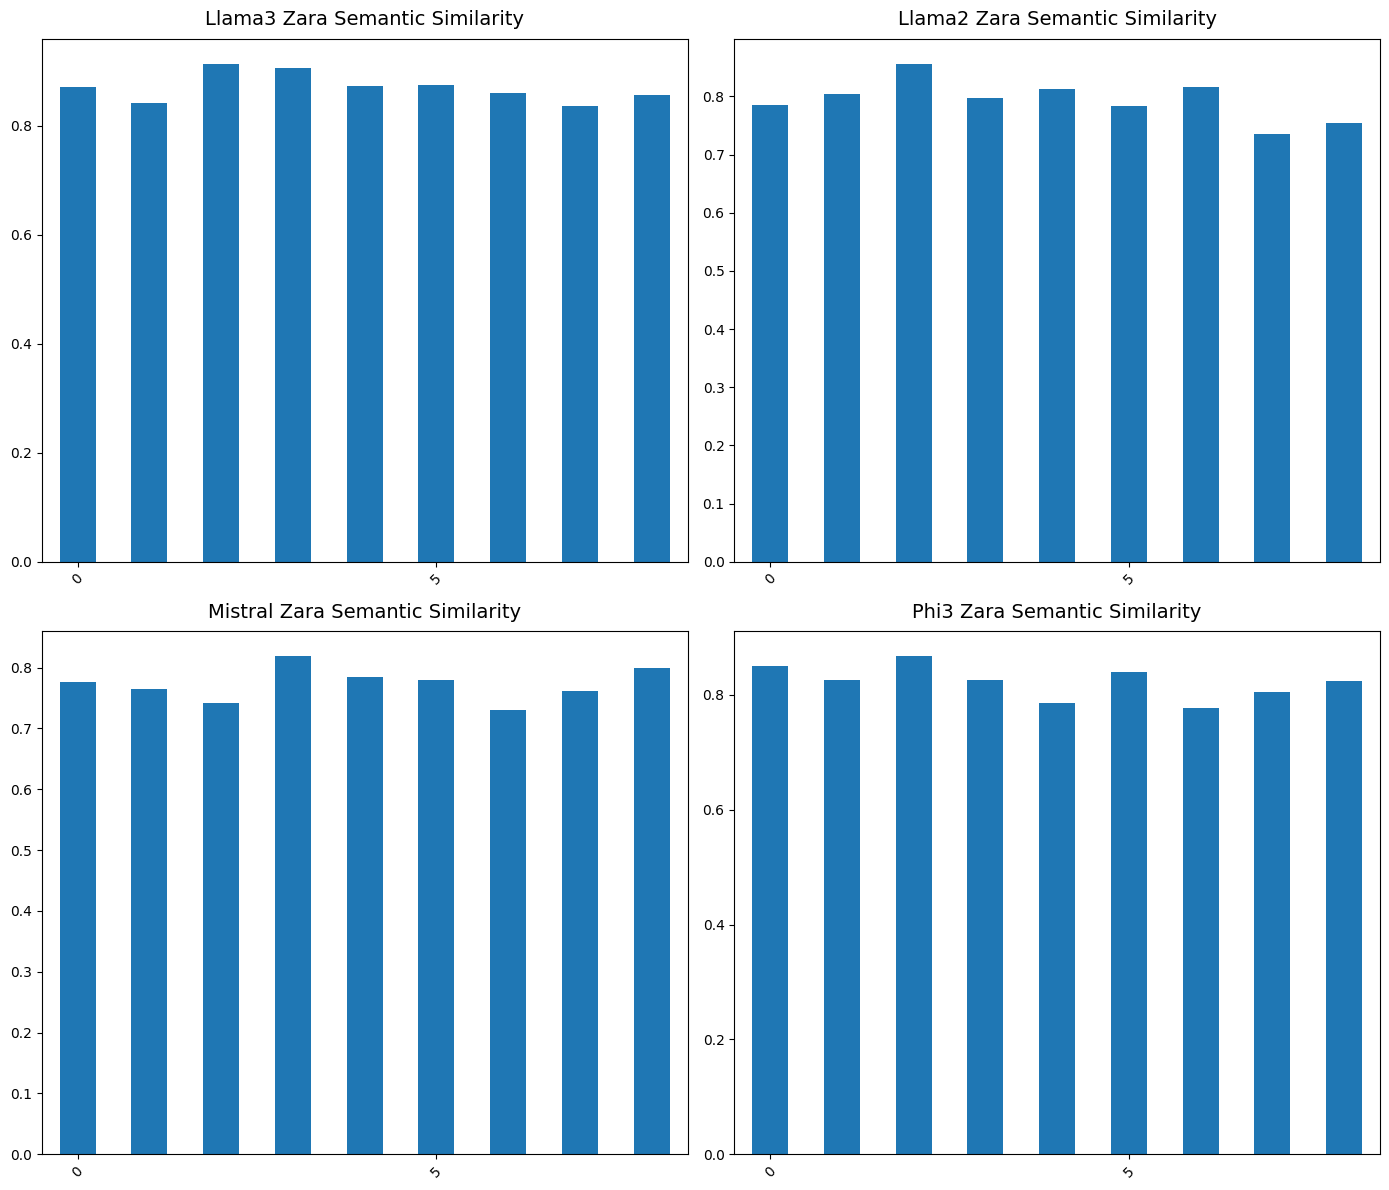

In [195]:
zara_datasets = [llama3_zara, llama2_zara, mistral_zara, phi3_zara]
zara_names = ["Llama3 Zara", "Llama2 Zara", "Mistral Zara", "Phi3 Zara"]
plot_semantic_similarity(zara_datasets, zara_names, './semantic_zara_scene_det.png')

In [196]:
for idx, dataset in enumerate(zara_datasets):
    print(f"dataset: {zara_names[idx]} mean: {dataset["semantic_semilarity_score"].mean()}")

dataset: Llama3 Zara mean: 0.8706940204867347
dataset: Llama2 Zara mean: 0.7939590978295797
dataset: Mistral Zara mean: 0.773172948944051
dataset: Phi3 Zara mean: 0.822603652507956


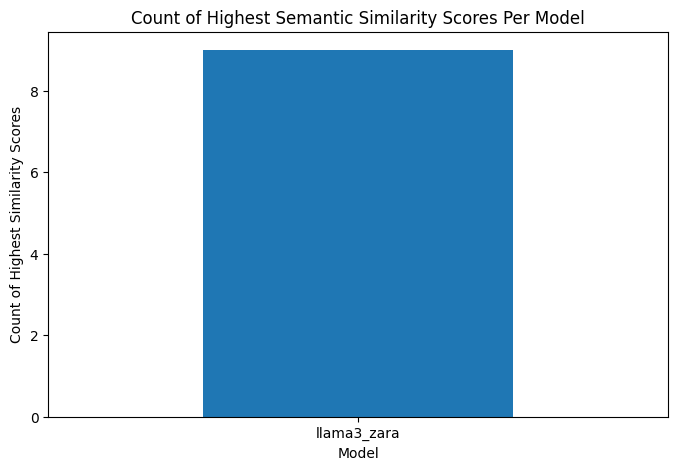

llama3_zara    9
Name: count, dtype: int64


In [197]:
datasets = ['llama3_zara', 'llama2_zara', 'mistral_zara', 'phi3_zara']

semantic_df = pd.DataFrame({dataset: getattr(eval(dataset), "semantic_semilarity_score") for dataset in datasets})

highest_counts = semantic_df.idxmax(axis=1).value_counts()

plt.figure(figsize=(8, 5))
highest_counts.plot(kind='bar')

plt.xlabel("Model")
plt.ylabel("Count of Highest Similarity Scores")
plt.title("Count of Highest Semantic Similarity Scores Per Model")
plt.xticks(rotation=0)

plt.show()
print(highest_counts)    

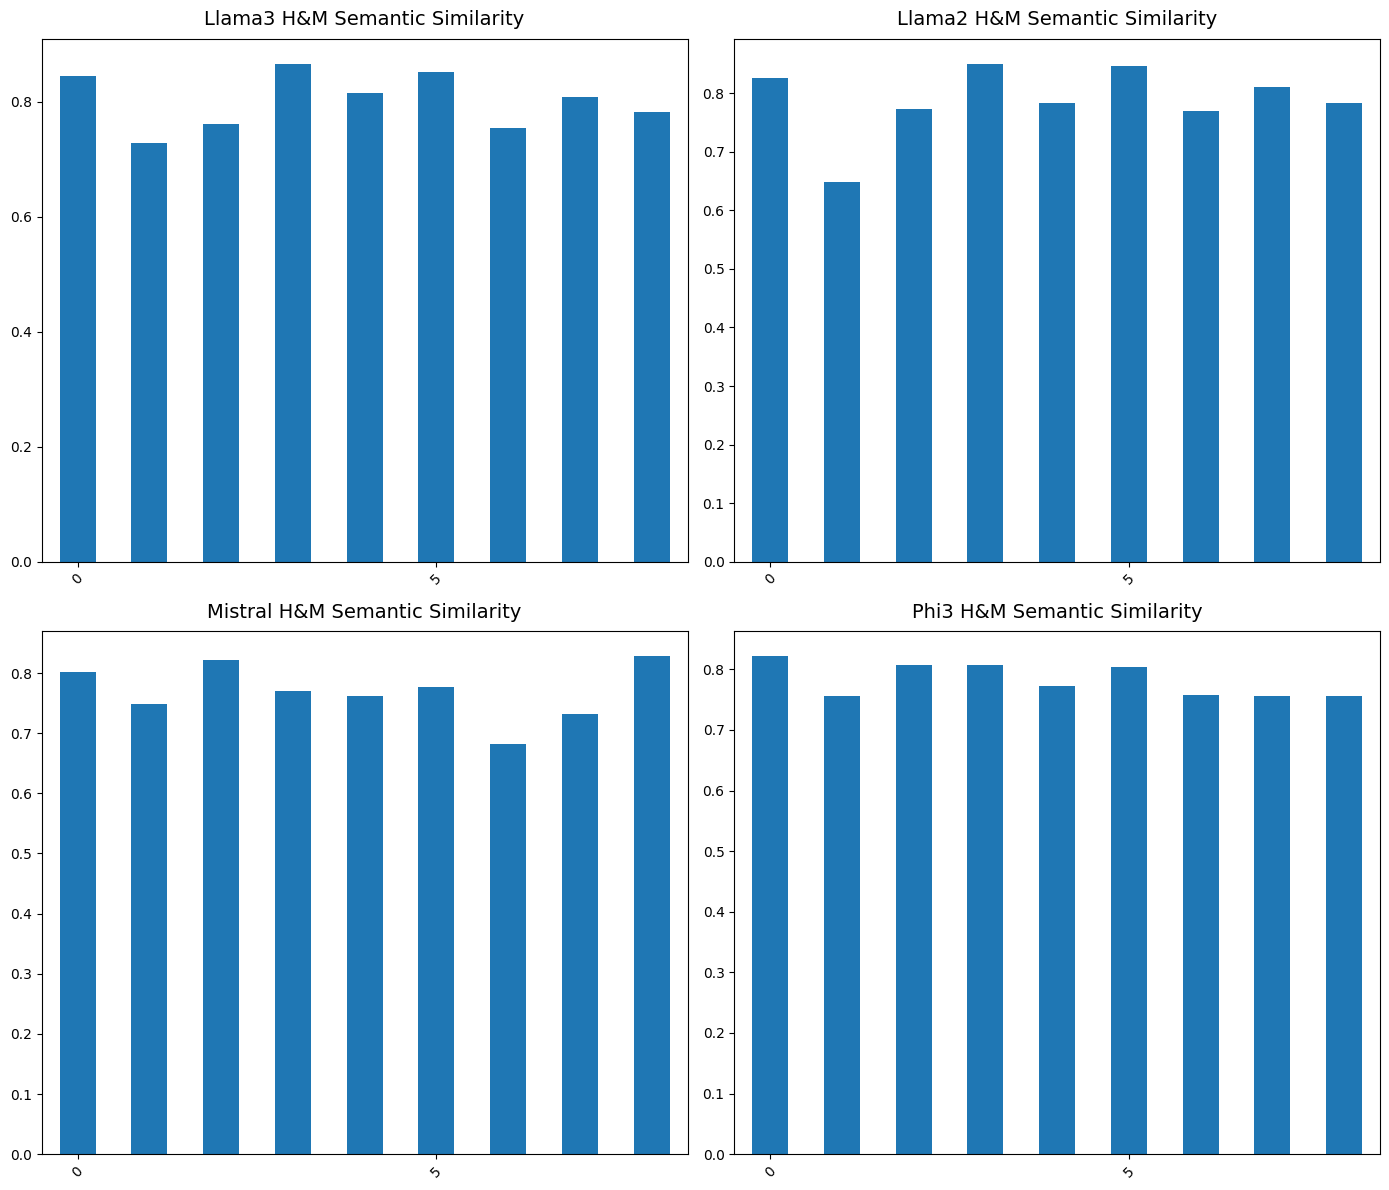

In [198]:
hm_datasets = [llama3_hm, llama2_hm, mistral_hm, phi3_hm]
hm_names = ["Llama3 H&M", "Llama2 H&M", "Mistral H&M", "Phi3 H&M"]
plot_semantic_similarity(hm_datasets, hm_names, './semantic_hm_scene_det.png')

In [199]:
for idx, dataset in enumerate(hm_datasets):
    print(f"dataset: {hm_names[idx]} mean: {dataset["semantic_semilarity_score"].mean()}")

dataset: Llama3 H&M mean: 0.8008812304422595
dataset: Llama2 H&M mean: 0.7878565315391086
dataset: Mistral H&M mean: 0.7690546330374901
dataset: Phi3 H&M mean: 0.7818929922598948


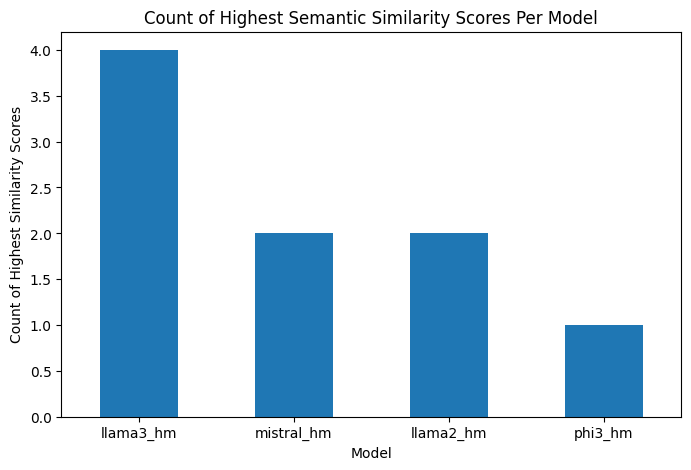

llama3_hm     4
mistral_hm    2
llama2_hm     2
phi3_hm       1
Name: count, dtype: int64


In [200]:
datasets = ['llama3_hm', 'llama2_hm', 'mistral_hm', 'phi3_hm']

semantic_df = pd.DataFrame({dataset: getattr(eval(dataset), "semantic_semilarity_score") for dataset in datasets})

highest_counts = semantic_df.idxmax(axis=1).value_counts()

plt.figure(figsize=(8, 5))
highest_counts.plot(kind='bar')

plt.xlabel("Model")
plt.ylabel("Count of Highest Similarity Scores")
plt.title("Count of Highest Semantic Similarity Scores Per Model")
plt.xticks(rotation=0)

plt.show()
print(highest_counts) 

## <a id='toc1_2_'></a>[Correctness](#toc0_)

In [201]:
def plot_correctness_scores(datasets, dataset_names, filename):
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    axes = axes.flatten()

    for i, (dataset, name) in enumerate(zip(datasets, dataset_names)):
        correctness_counts = dataset.correctness_score.value_counts()
        correctness_counts.plot(kind="bar", ax=axes[i], title=f"{name} Correctness Score")

        axes[i].set_title(f"{name} Correctness Score", fontsize=14)
        axes[i].tick_params(axis='x', rotation=45, labelsize=12)
        axes[i].tick_params(axis='y', labelsize=12)

    plt.savefig(filename)
    plt.show()

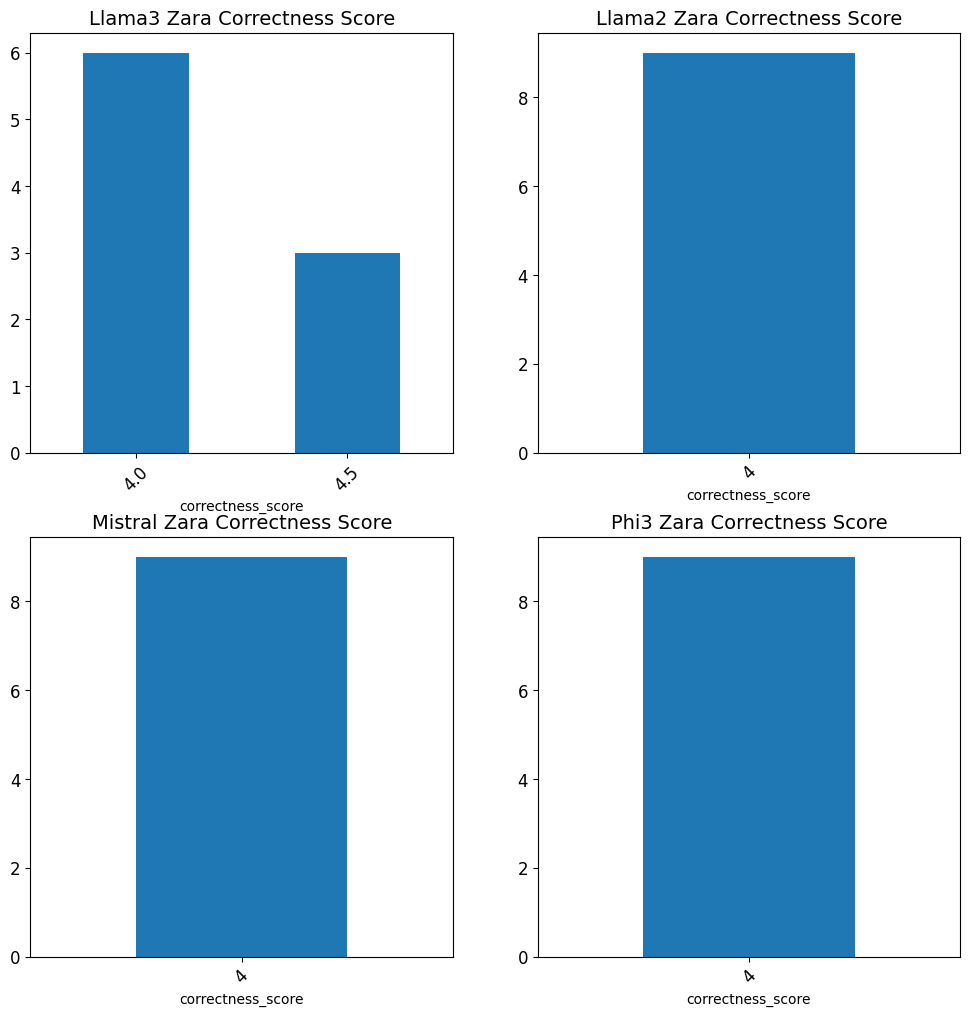

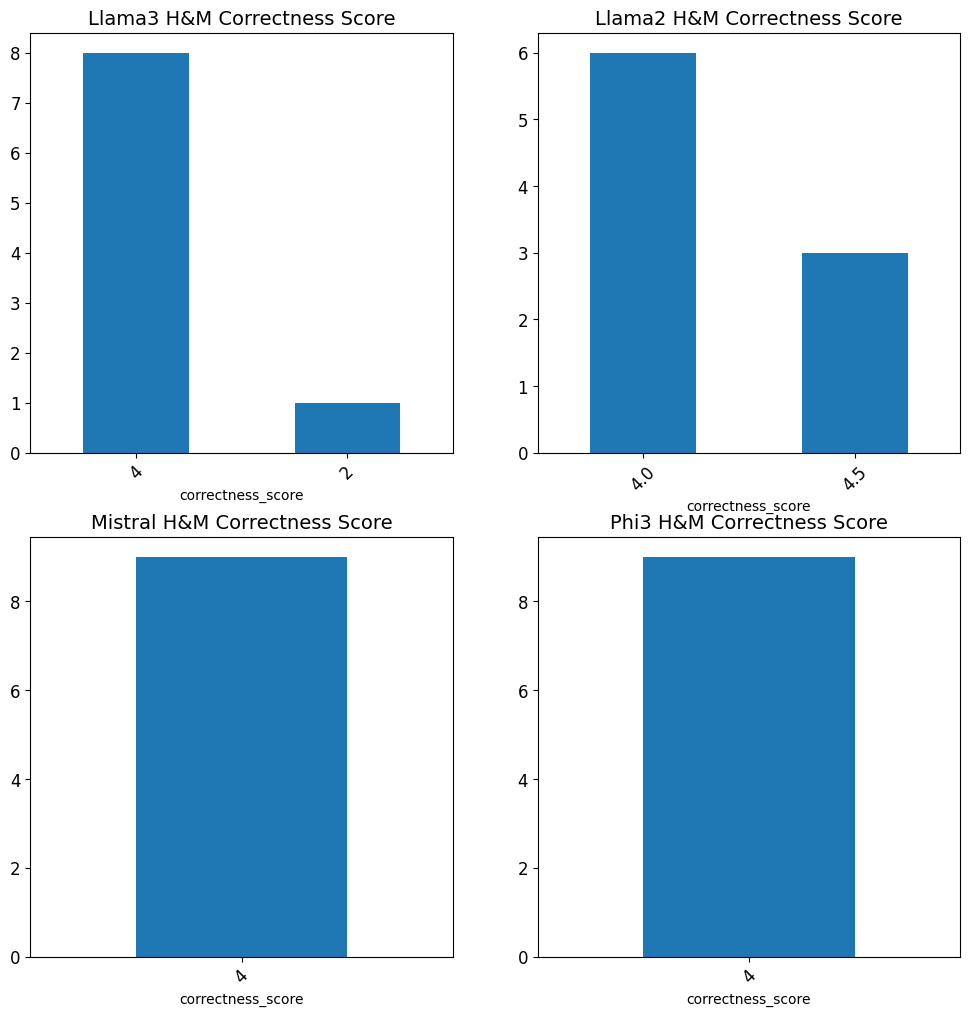

In [202]:
zara_datasets = [llama3_zara, llama2_zara, mistral_zara, phi3_zara]
zara_names = ["Llama3 Zara", "Llama2 Zara", "Mistral Zara", "Phi3 Zara"]
plot_correctness_scores(zara_datasets, zara_names, './correct_zara_scene_det.png')

hm_datasets = [llama3_hm, llama2_hm, mistral_hm, phi3_hm]
hm_names = ["Llama3 H&M", "Llama2 H&M", "Mistral H&M", "Phi3 H&M"]
plot_correctness_scores(hm_datasets, hm_names, './correct_hm_scene_det.png')

## <a id='toc1_3_'></a>[Context relevancy](#toc0_)

In [203]:
def plot_context_relevancy(datasets, dataset_names, filename, few_labels=True):
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    axes = axes.flatten()

    for i, (dataset, name) in enumerate(zip(datasets, dataset_names)):
        ax = dataset["context_relevancy_score"].plot(kind="bar", ax=axes[i], title=f"{name} Context Relevancy")

        x_labels = ax.get_xticklabels()
        x_positions = range(len(x_labels))

        if few_labels:
            ax.set_xticks([x for i, x in enumerate(x_positions) if i % 5 == 0])
            ax.set_xticklabels([label.get_text() for i, label in enumerate(x_labels) if i % 5 == 0], rotation=45)

        ax.set_title(f"{name} Context Relevancy", fontsize=14, pad=10)
        ax.tick_params(axis='both', labelsize=10)

    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

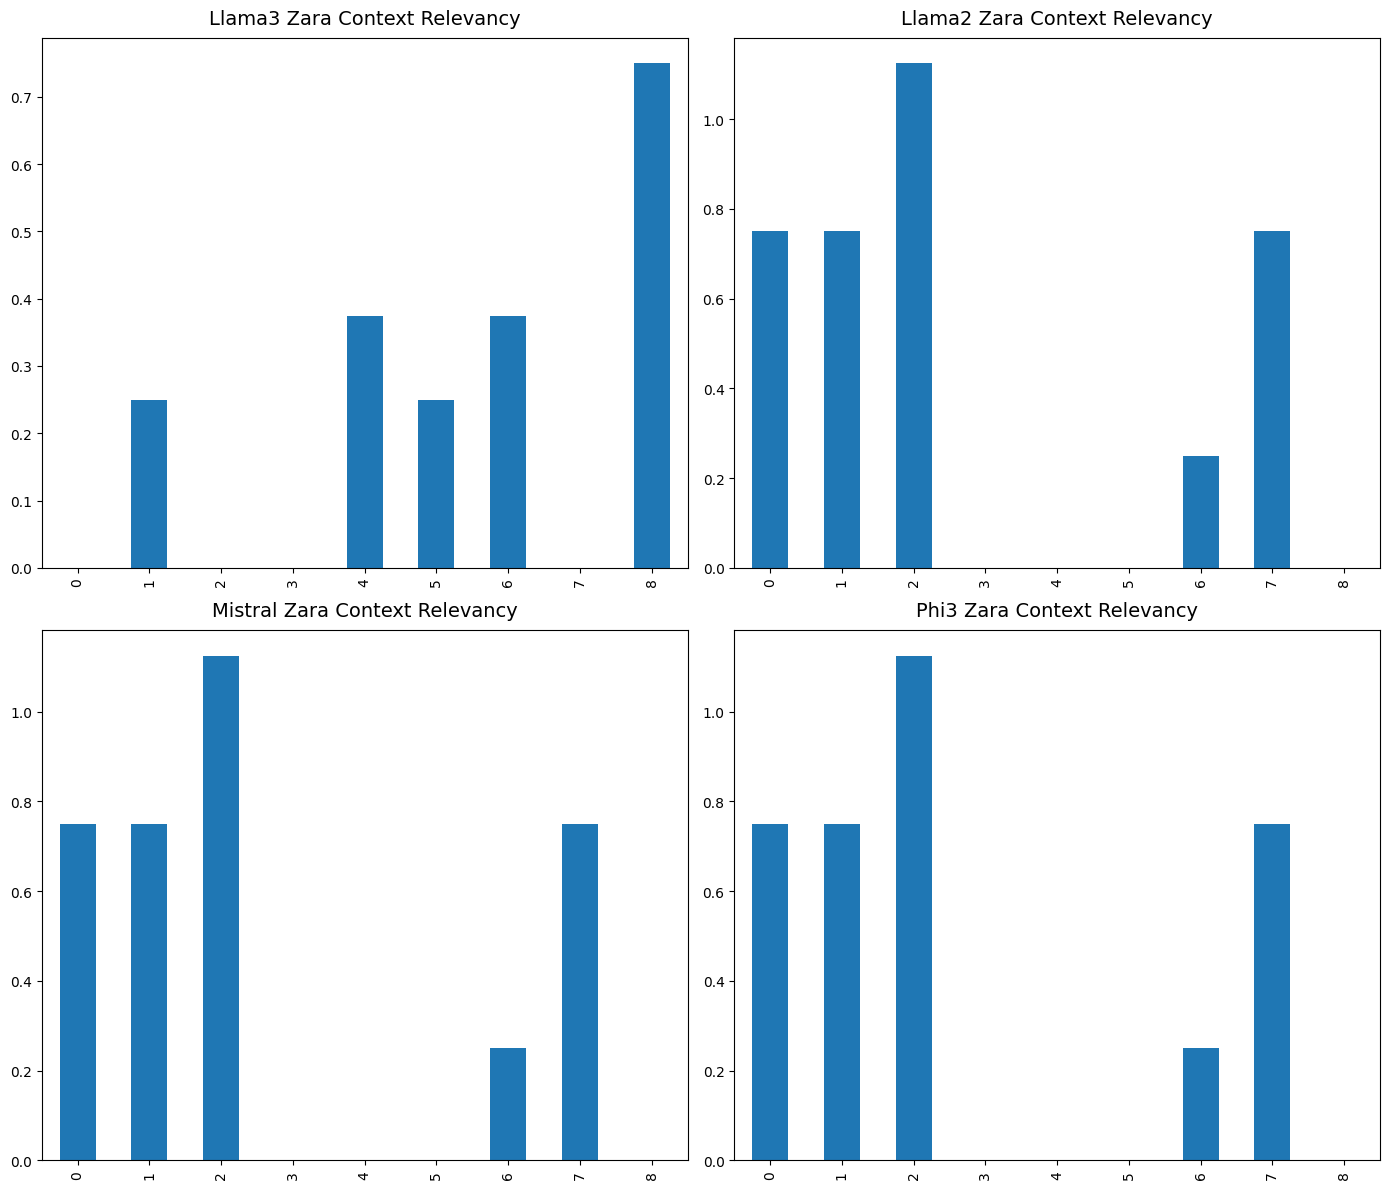

In [204]:
zara_datasets = [llama3_zara, llama2_zara, mistral_zara, phi3_zara]
zara_names = ["Llama3 Zara", "Llama2 Zara", "Mistral Zara", "Phi3 Zara"]
plot_context_relevancy(zara_datasets, zara_names, './context_zara_scene_det.png', False)

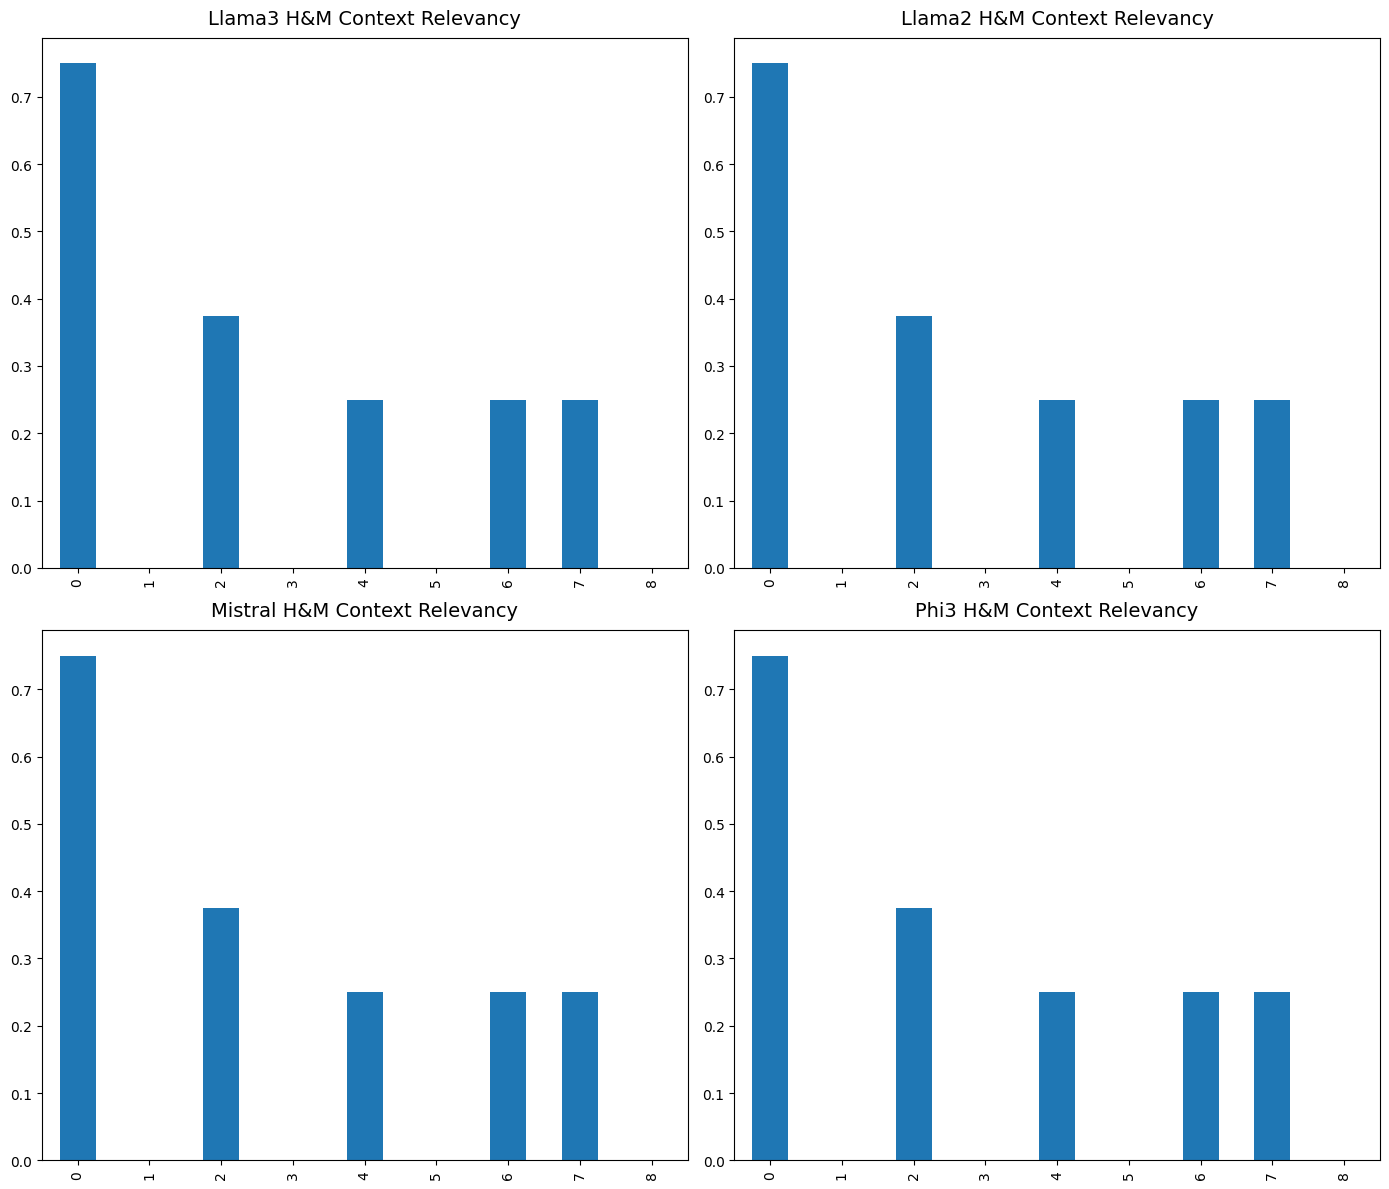

In [205]:
hm_datasets = [llama3_hm, llama2_hm, mistral_hm, phi3_hm]
hm_names = ["Llama3 H&M", "Llama2 H&M", "Mistral H&M", "Phi3 H&M"]
plot_context_relevancy(hm_datasets, hm_names, './correct_hm_scene_det.png', False)

## <a id='toc1_4_'></a>[Faithfulness](#toc0_)

In [206]:
def plot_faithfulness_scores(datasets, dataset_names, filename):
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    axes = axes.flatten()

    for i, (dataset, name) in enumerate(zip(datasets, dataset_names)):
        faithfulness_counts = dataset["faithfulness_score"].value_counts()
        faithfulness_counts.plot(kind="bar", ax=axes[i], title=f"{name} Faithfulness Score")

        axes[i].set_title(f"{name} Faithfulness Score", fontsize=14)
        axes[i].tick_params(axis='x', rotation=45, labelsize=12)
        axes[i].tick_params(axis='y', labelsize=12)

    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

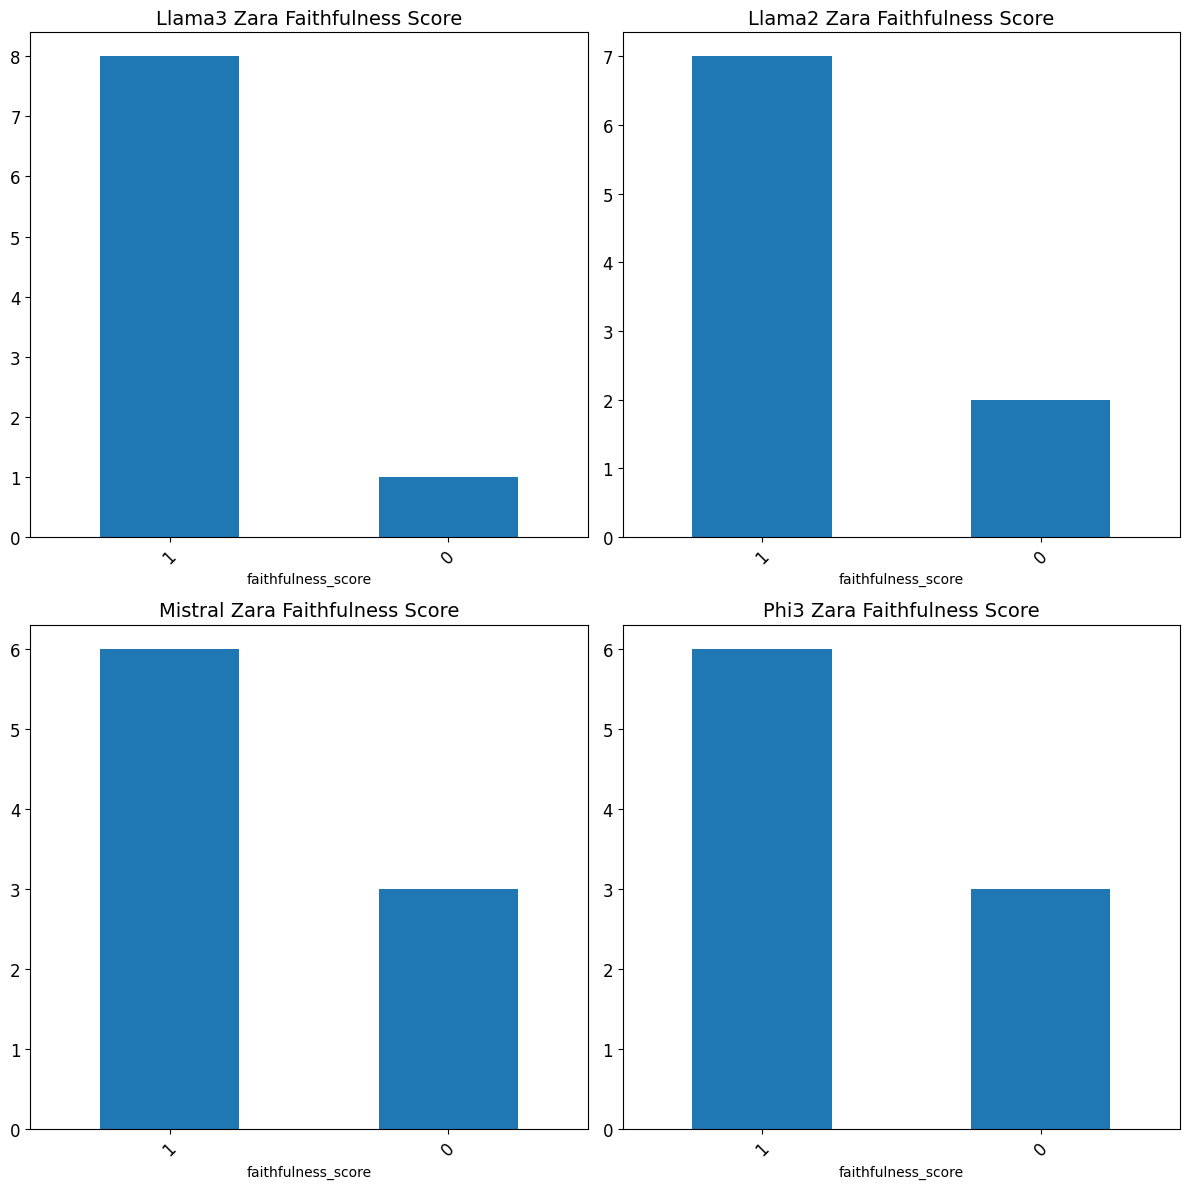

In [207]:
zara_datasets = [llama3_zara, llama2_zara, mistral_zara, phi3_zara]
zara_names = ["Llama3 Zara", "Llama2 Zara", "Mistral Zara", "Phi3 Zara"]
plot_faithfulness_scores(zara_datasets, zara_names, './faith_zara_scene_det.png')

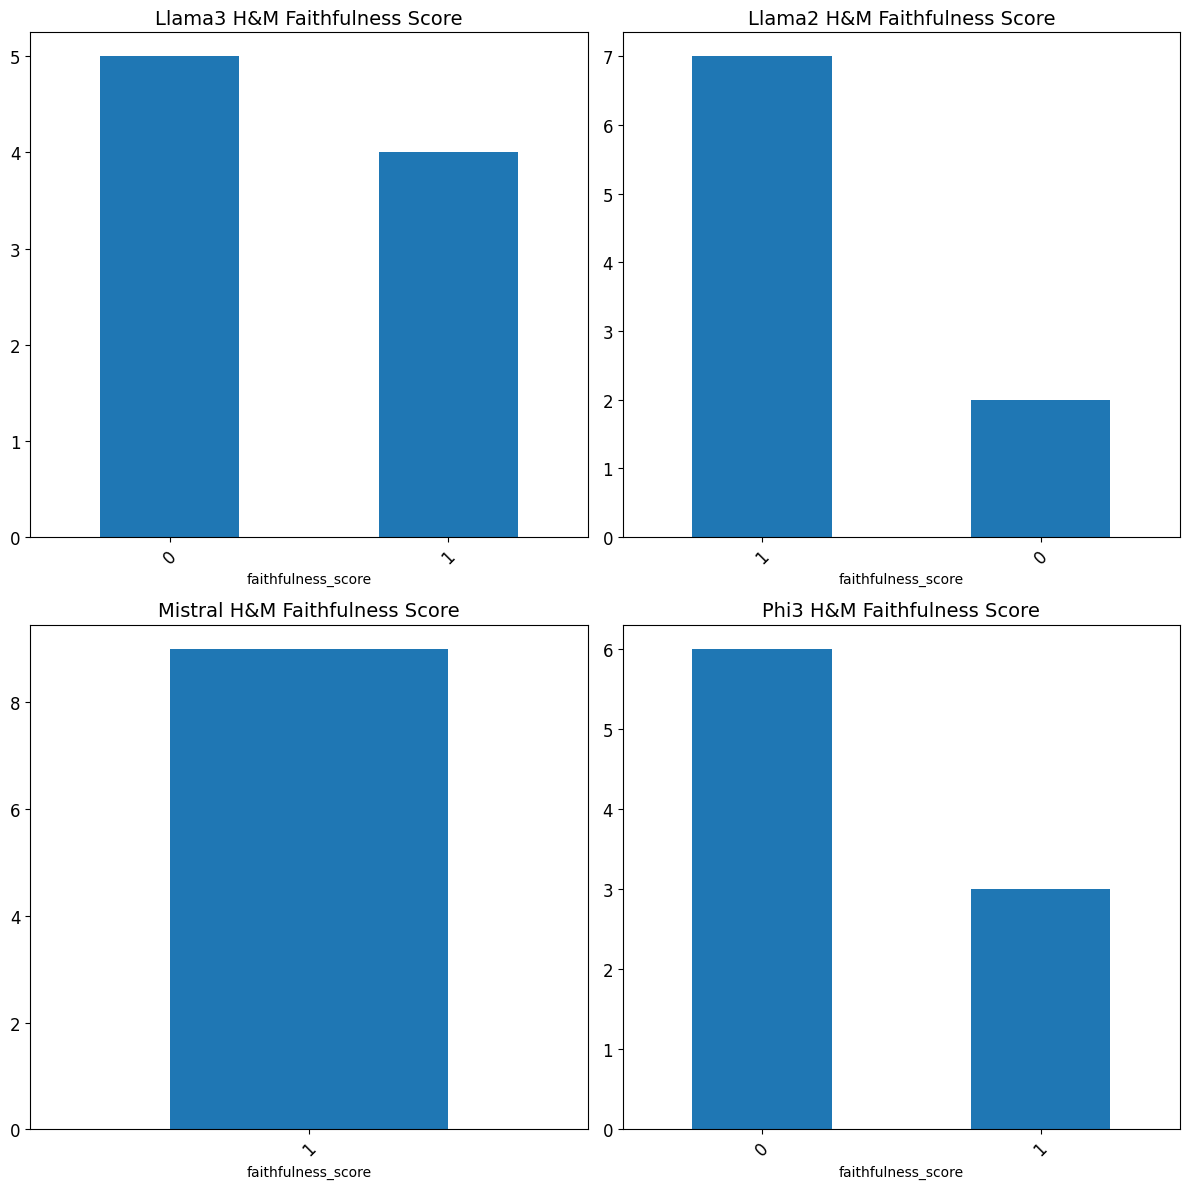

In [208]:
hm_datasets = [llama3_hm, llama2_hm, mistral_hm, phi3_hm]
hm_names = ["Llama3 H&M", "Llama2 H&M", "Mistral H&M", "Phi3 H&M"]
plot_faithfulness_scores(hm_datasets, hm_names, './faith_hm_scene_det.png')

# <a id='toc2_'></a>[Greenwashing Mitigation](#toc0_)

In [209]:
llama3_zara = pd.read_excel('./data/scenarios_zara_llama3_instruct_topk8_paramsall.xlsx')
llama3_zara.drop('Unnamed: 0', axis=1, inplace=True)
llama3_zara =llama3_zara.iloc[10:]

llama2_zara = pd.read_excel('./data/scenarios_zara_llama2_topk8_paramsall.xlsx')
llama2_zara.drop('Unnamed: 0', axis=1, inplace=True)
llama2_zara = llama2_zara.iloc[10:]

mistral_zara = pd.read_excel('./data/scenarios_zara_mistral_topk8_paramsall.xlsx')
mistral_zara.drop('Unnamed: 0', axis=1, inplace=True)
mistral_zara = mistral_zara.iloc[10:]

phi3_zara = pd.read_excel('./data/scenarios_zara_phi3_14b-instruct_topk8_paramsall.xlsx')
phi3_zara.drop('Unnamed: 0', axis=1, inplace=True)
phi3_zara = phi3_zara.iloc[10:]

llama3_hm = pd.read_excel('./data/scenarios_hm_llama3_instruct_topk8_paramsall.xlsx')
llama3_hm.drop('Unnamed: 0', axis=1, inplace=True)
llama3_hm =llama3_hm.iloc[10:]

llama2_hm = pd.read_excel('./data/scenarios_hm_llama2_topk8_paramsall.xlsx')
llama2_hm.drop('Unnamed: 0', axis=1, inplace=True)
llama2_hm = llama2_hm.iloc[10:]

mistral_hm = pd.read_excel('./data/scenarios_hm_mistral_topk8_paramsall.xlsx')
mistral_hm.drop('Unnamed: 0', axis=1, inplace=True)
mistral_hm = mistral_hm.iloc[10:]

phi3_hm = pd.read_excel('./data/scenarios_hm_phi3_14b-instruct_topk8_paramsall.xlsx')
phi3_hm.drop('Unnamed: 0', axis=1, inplace=True)
phi3_hm = phi3_hm.iloc[10:]

## <a id='toc2_1_'></a>[Semantic Simularity](#toc0_)

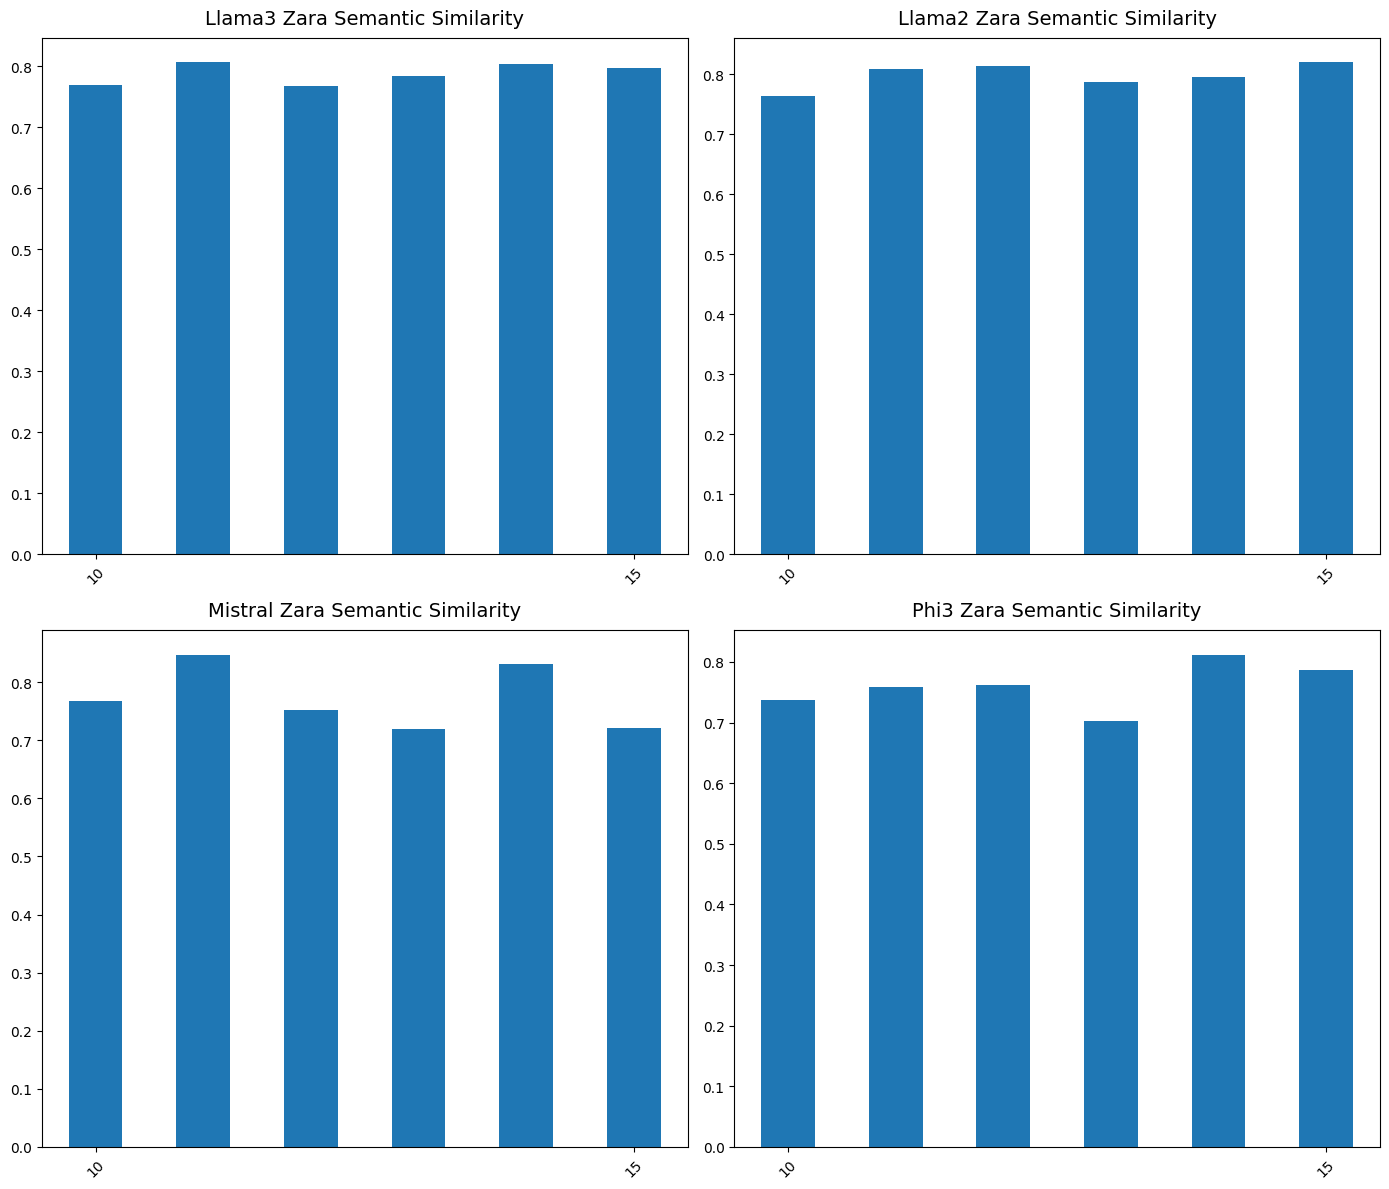

In [210]:
zara_datasets = [llama3_zara, llama2_zara, mistral_zara, phi3_zara]
zara_names = ["Llama3 Zara", "Llama2 Zara", "Mistral Zara", "Phi3 Zara"]
plot_semantic_similarity(zara_datasets, zara_names, './semantic_zara_scene_mit.png')

In [211]:
for idx, dataset in enumerate(zara_datasets):
    print(f"dataset: {zara_names[idx]} mean: {dataset["semantic_semilarity_score"].mean()}")

dataset: Llama3 Zara mean: 0.7881119830247277
dataset: Llama2 Zara mean: 0.7984237612333206
dataset: Mistral Zara mean: 0.7731325131486134
dataset: Phi3 Zara mean: 0.759767202897454


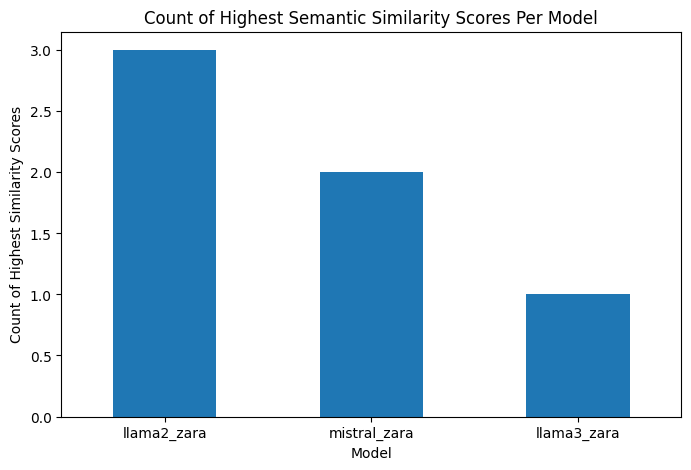

llama2_zara     3
mistral_zara    2
llama3_zara     1
Name: count, dtype: int64


In [212]:
datasets = ['llama3_zara', 'llama2_zara', 'mistral_zara', 'phi3_zara']

semantic_df = pd.DataFrame({dataset: getattr(eval(dataset), "semantic_semilarity_score") for dataset in datasets})

highest_counts = semantic_df.idxmax(axis=1).value_counts()

plt.figure(figsize=(8, 5))
highest_counts.plot(kind='bar')

plt.xlabel("Model")
plt.ylabel("Count of Highest Similarity Scores")
plt.title("Count of Highest Semantic Similarity Scores Per Model")
plt.xticks(rotation=0)

plt.show()
print(highest_counts) 

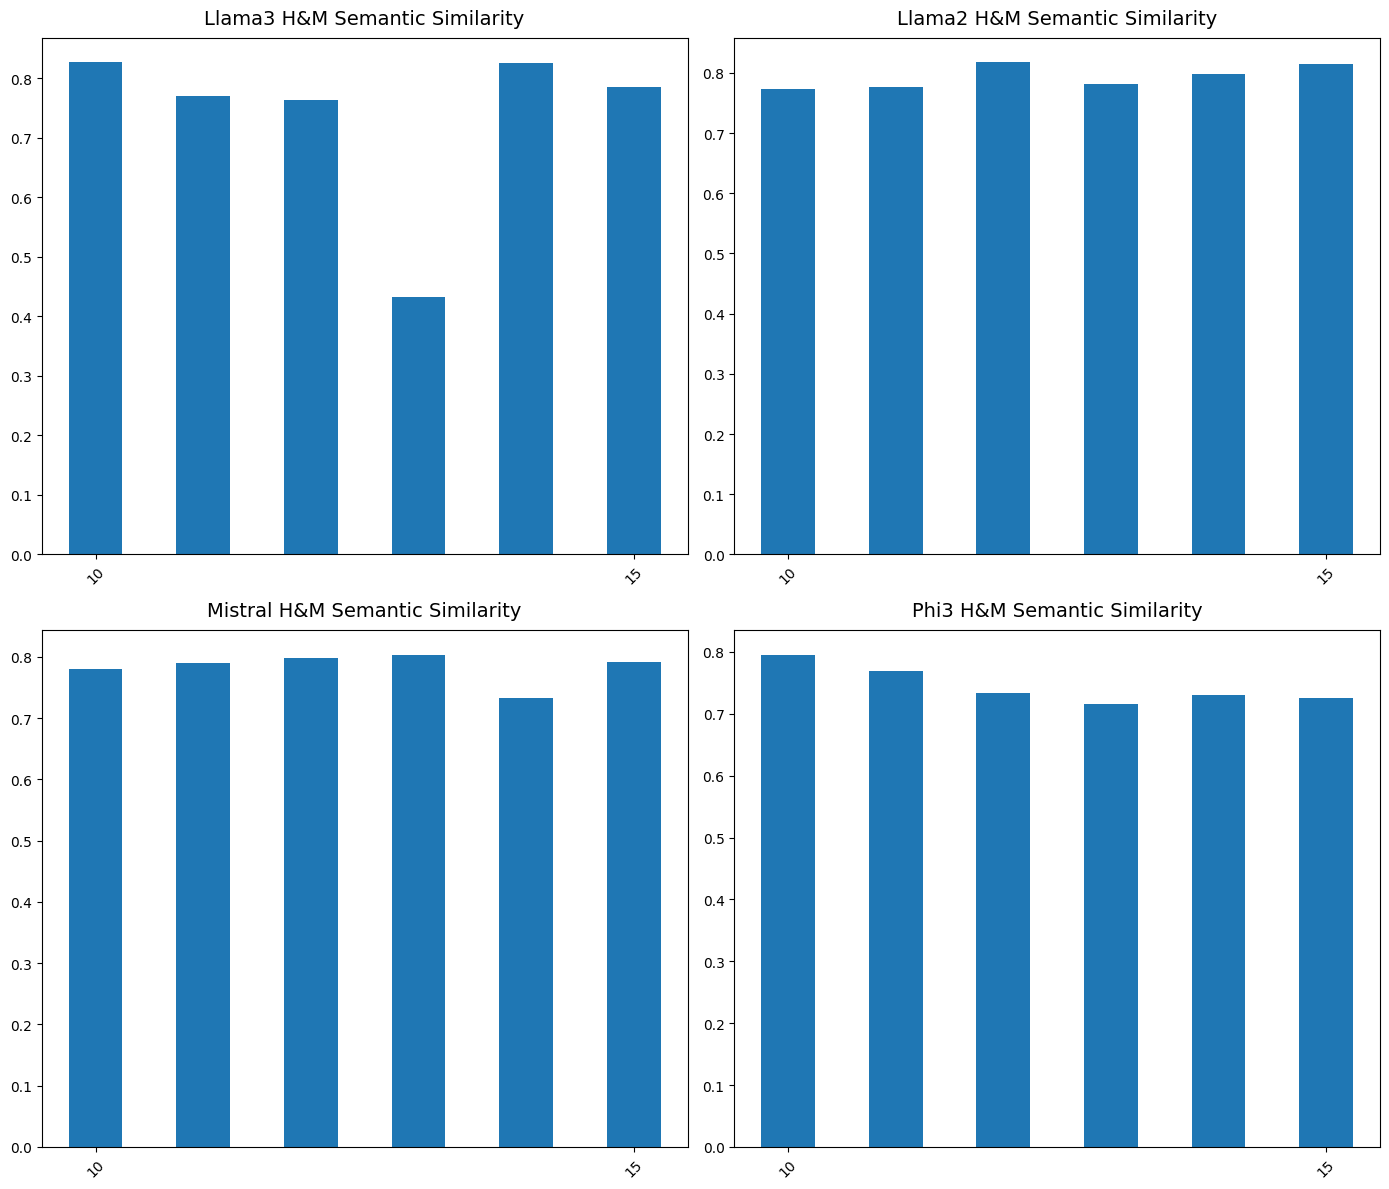

In [213]:
hm_datasets = [llama3_hm, llama2_hm, mistral_hm, phi3_hm]
hm_names = ["Llama3 H&M", "Llama2 H&M", "Mistral H&M", "Phi3 H&M"]
plot_semantic_similarity(hm_datasets, hm_names, './semantic_hm_scene_mit.png')


In [214]:
for idx, dataset in enumerate(hm_datasets):
    print(f"dataset: {hm_names[idx]} mean: {dataset["semantic_semilarity_score"].mean()}")

dataset: Llama3 H&M mean: 0.7338636619400726
dataset: Llama2 H&M mean: 0.7935682651017947
dataset: Mistral H&M mean: 0.7828465238613268
dataset: Phi3 H&M mean: 0.7448500621834473


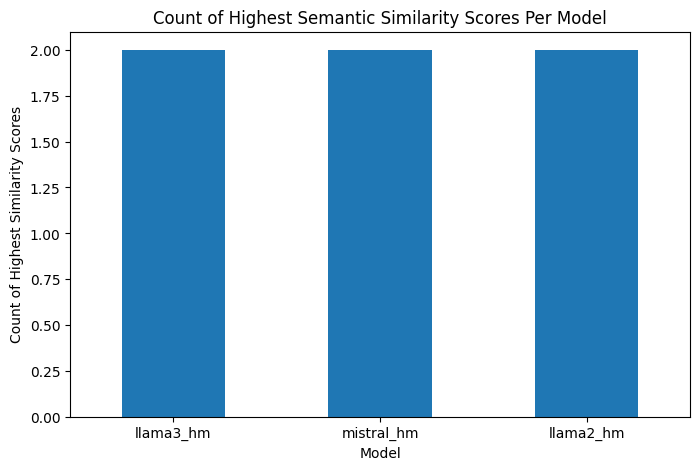

llama3_hm     2
mistral_hm    2
llama2_hm     2
Name: count, dtype: int64


In [215]:
datasets = ['llama3_hm', 'llama2_hm', 'mistral_hm', 'phi3_hm']

semantic_df = pd.DataFrame({dataset: getattr(eval(dataset), "semantic_semilarity_score") for dataset in datasets})

highest_counts = semantic_df.idxmax(axis=1).value_counts()

plt.figure(figsize=(8, 5))
highest_counts.plot(kind='bar')

plt.xlabel("Model")
plt.ylabel("Count of Highest Similarity Scores")
plt.title("Count of Highest Semantic Similarity Scores Per Model")
plt.xticks(rotation=0)

plt.show()
print(highest_counts) 

## <a id='toc2_2_'></a>[Correctness](#toc0_)

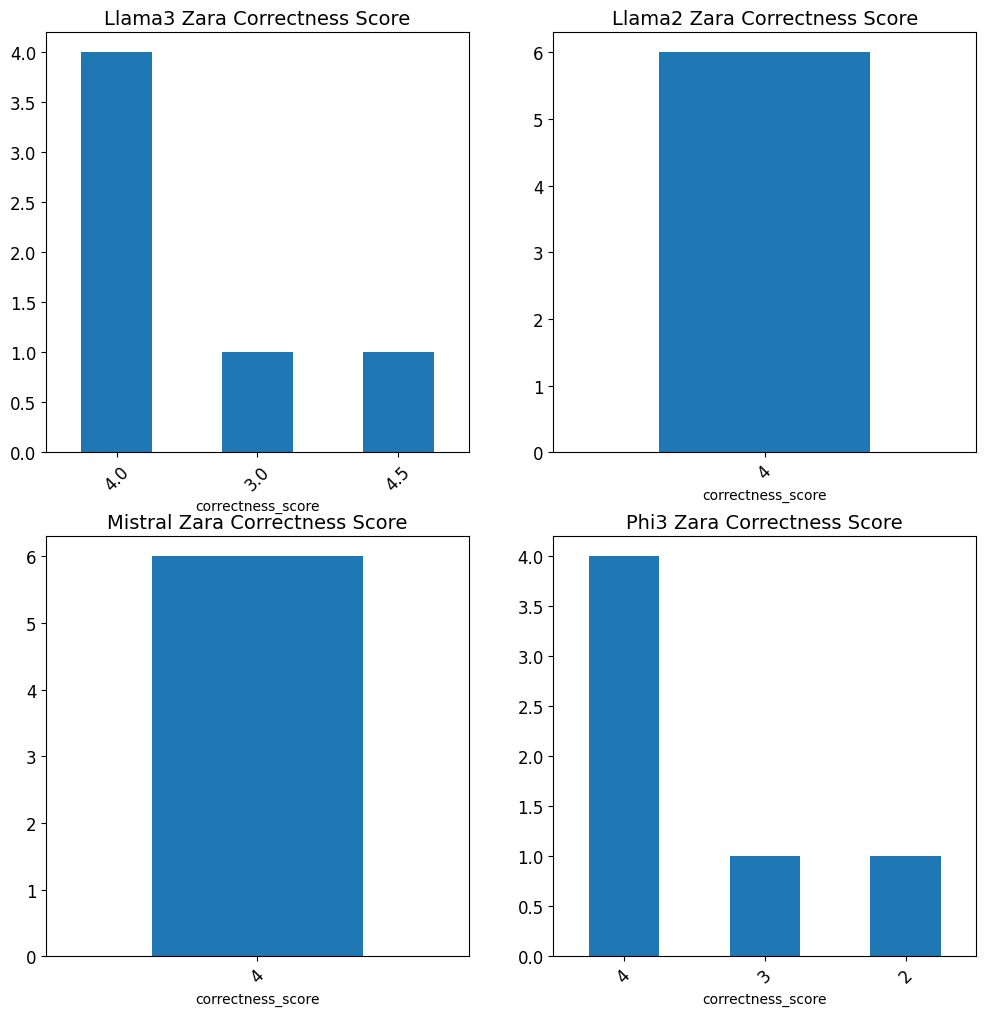

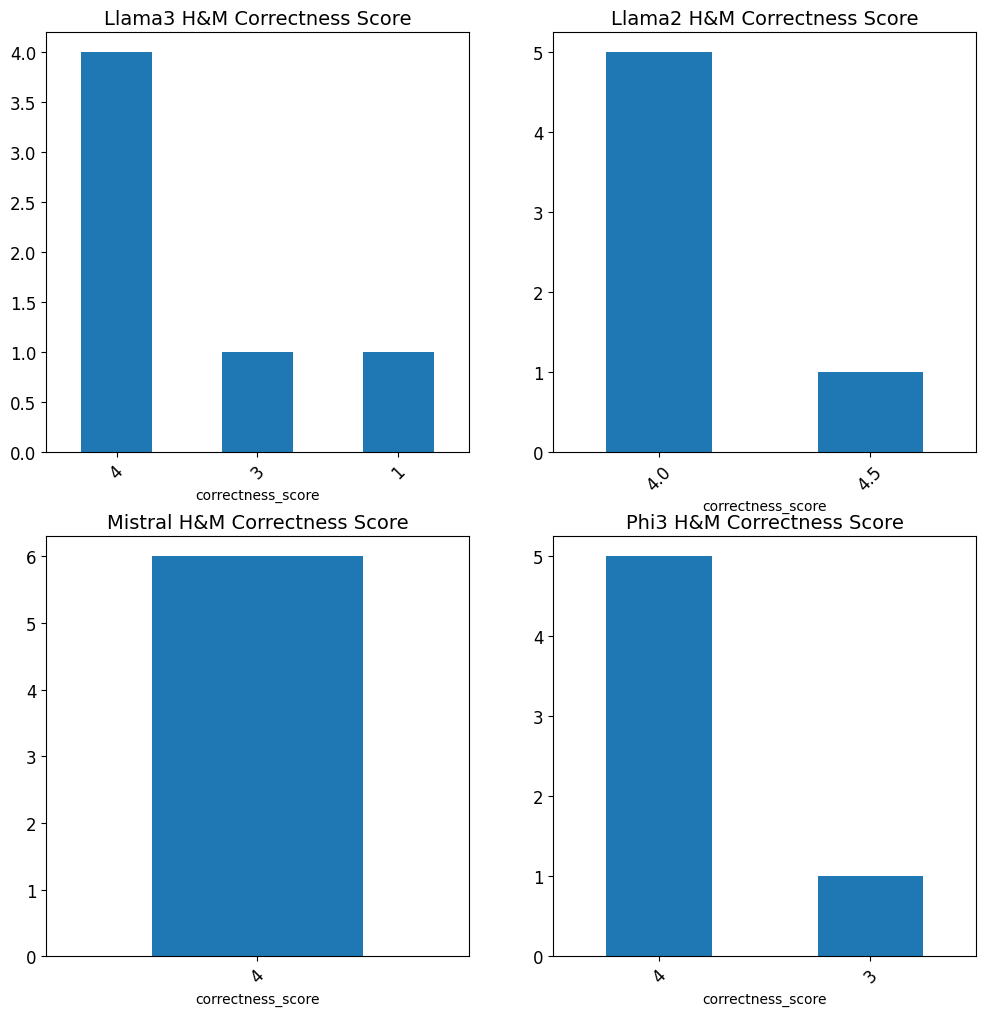

In [216]:
zara_datasets = [llama3_zara, llama2_zara, mistral_zara, phi3_zara]
zara_names = ["Llama3 Zara", "Llama2 Zara", "Mistral Zara", "Phi3 Zara"]
plot_correctness_scores(zara_datasets, zara_names, './correct_zara_scene_mit.png')

hm_datasets = [llama3_hm, llama2_hm, mistral_hm, phi3_hm]
hm_names = ["Llama3 H&M", "Llama2 H&M", "Mistral H&M", "Phi3 H&M"]
plot_correctness_scores(hm_datasets, hm_names, './correct_hm_scene_mit.png')

## <a id='toc2_3_'></a>[Context relevancy](#toc0_)

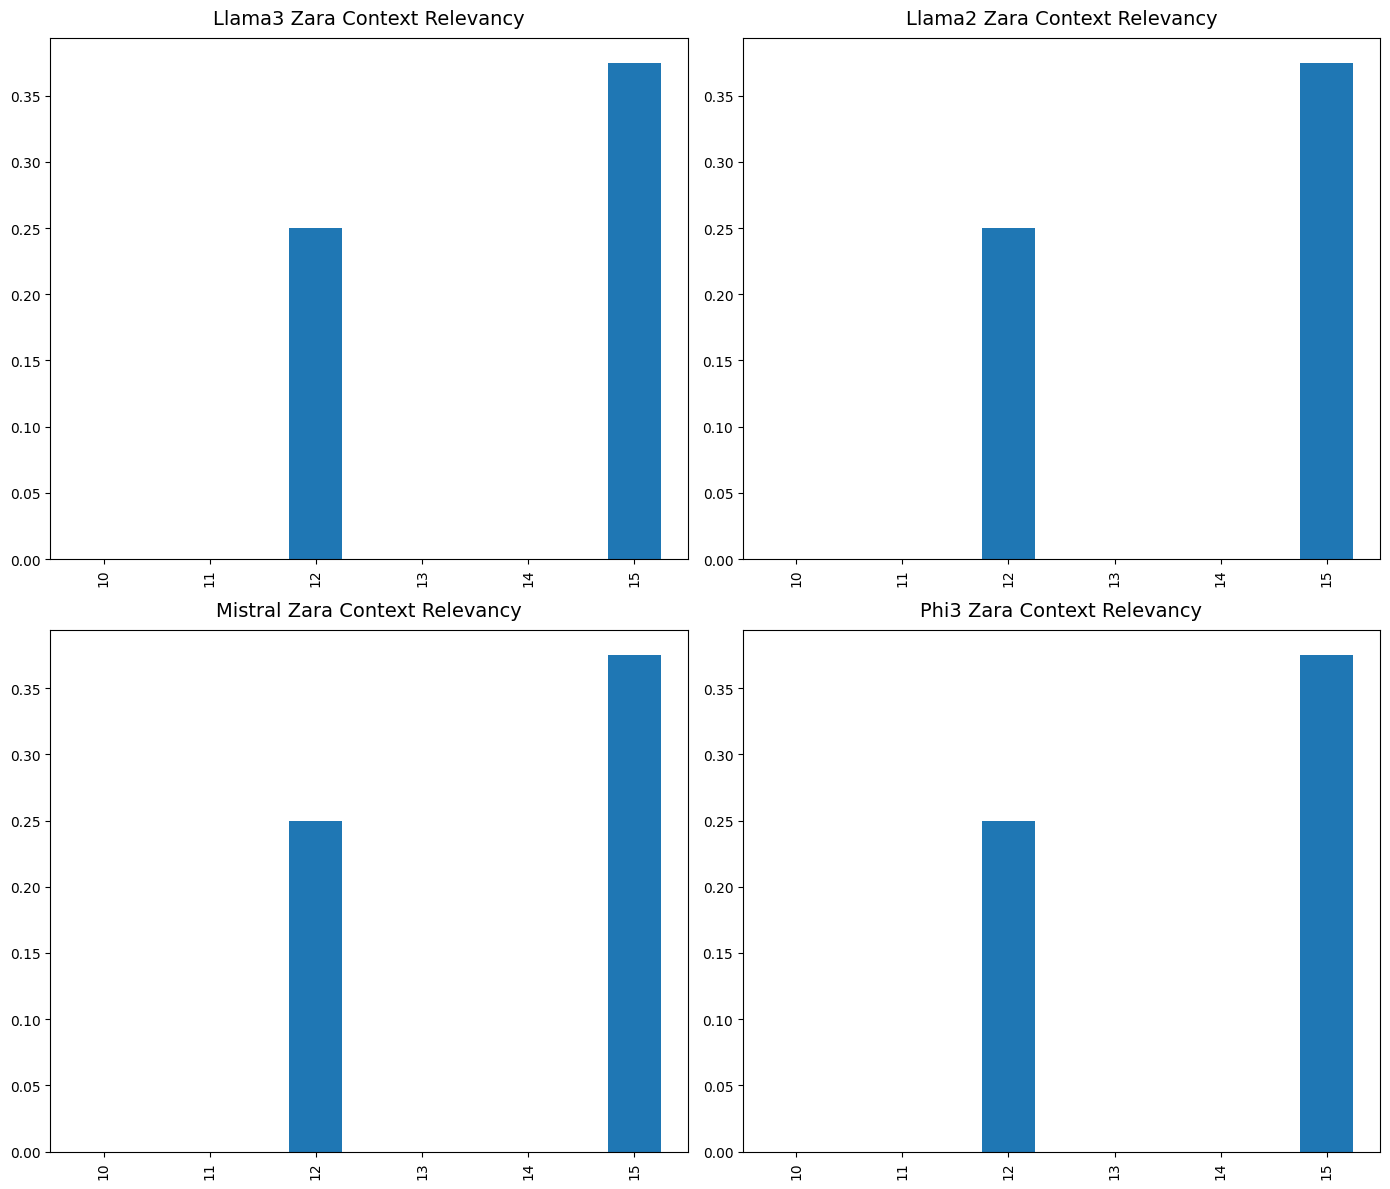

In [217]:
zara_datasets = [llama3_zara, llama2_zara, mistral_zara, phi3_zara]
zara_names = ["Llama3 Zara", "Llama2 Zara", "Mistral Zara", "Phi3 Zara"]
plot_context_relevancy(zara_datasets, zara_names, './context_zara_scene_mit.png', False)

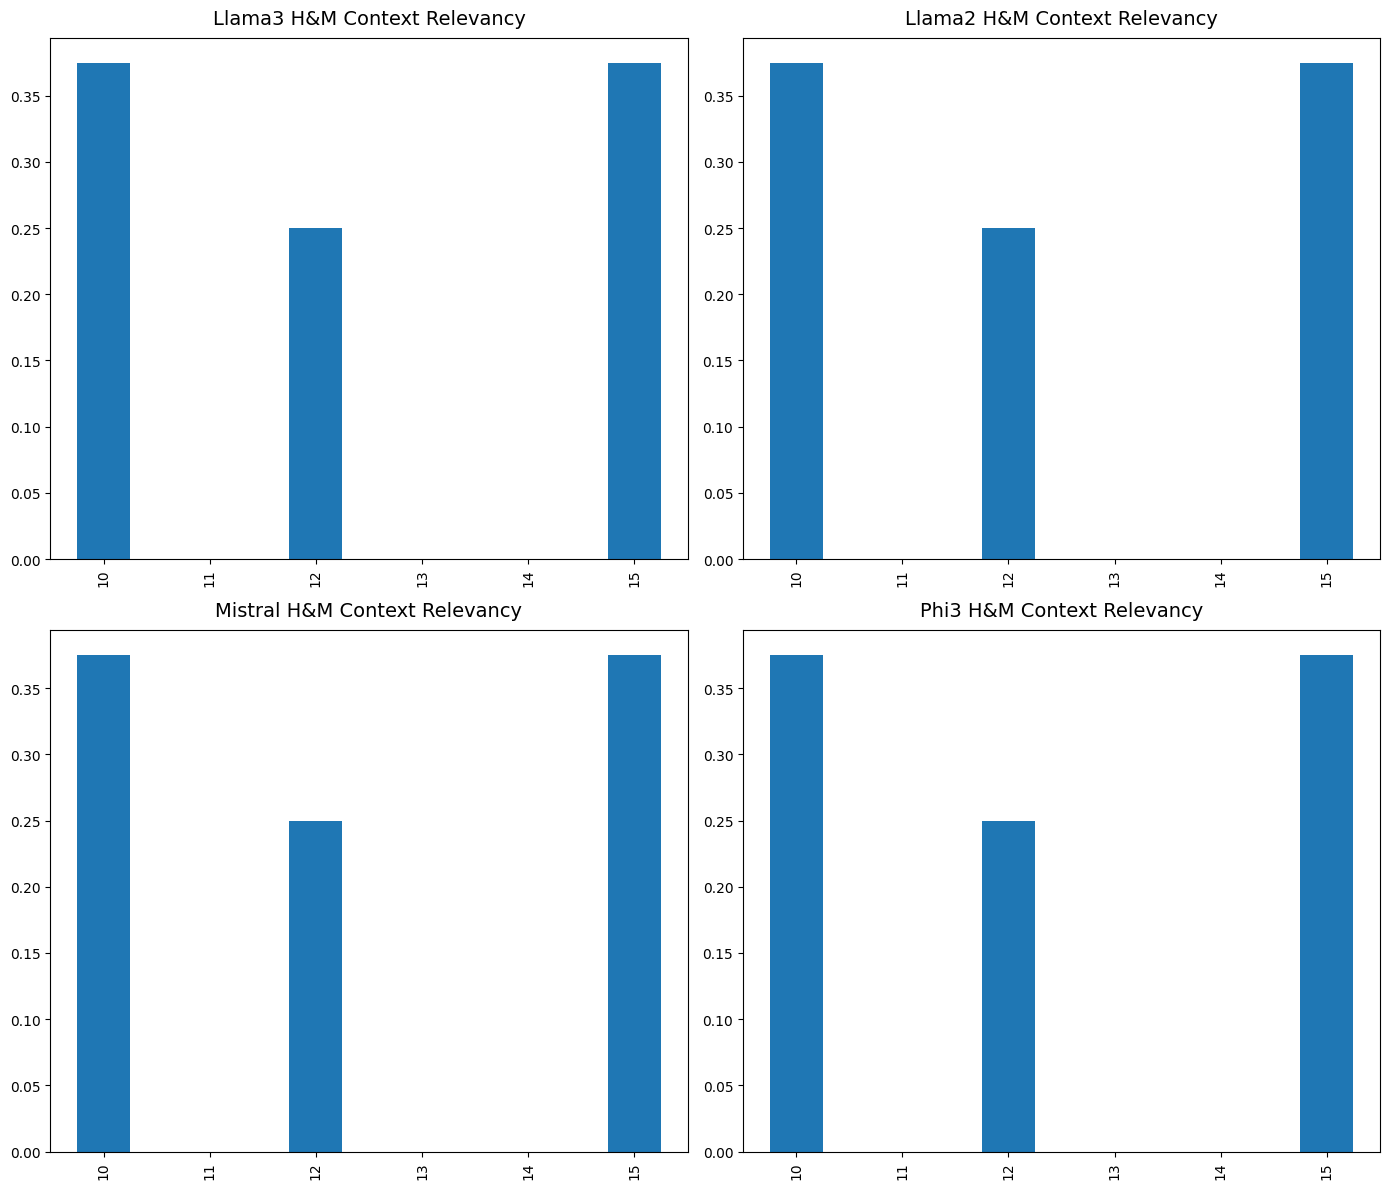

In [218]:
hm_datasets = [llama3_hm, llama2_hm, mistral_hm, phi3_hm]
hm_names = ["Llama3 H&M", "Llama2 H&M", "Mistral H&M", "Phi3 H&M"]
plot_context_relevancy(hm_datasets, hm_names, './correct_hm_scene_mit.png', False)

## <a id='toc2_4_'></a>[Faithfulness](#toc0_)

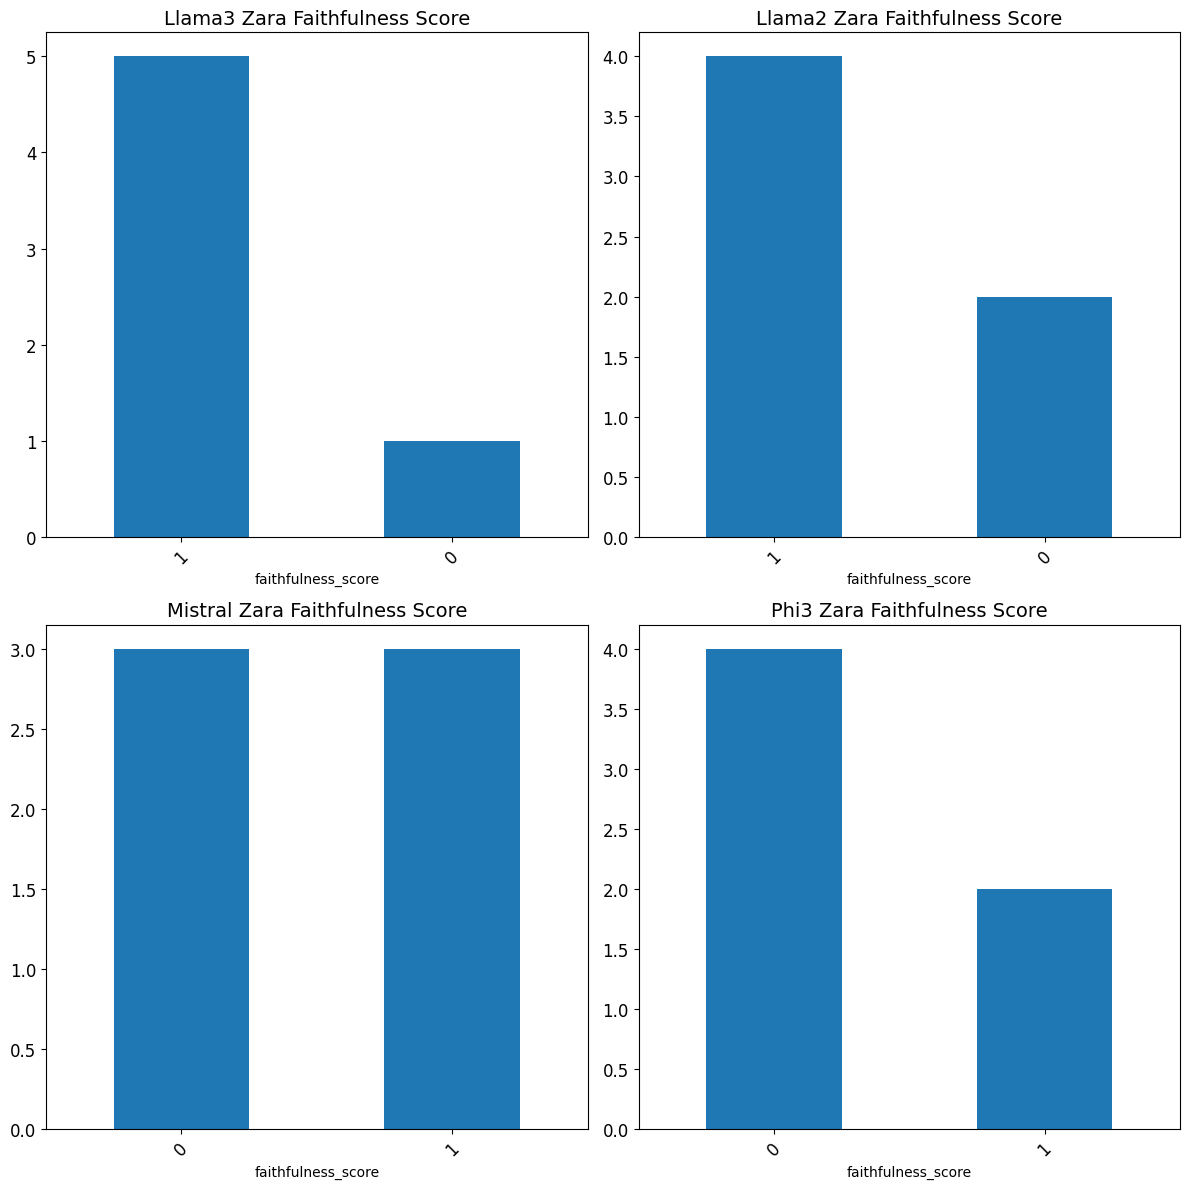

In [219]:
zara_datasets = [llama3_zara, llama2_zara, mistral_zara, phi3_zara]
zara_names = ["Llama3 Zara", "Llama2 Zara", "Mistral Zara", "Phi3 Zara"]
plot_faithfulness_scores(zara_datasets, zara_names, './faith_zara_scene_mit.png')

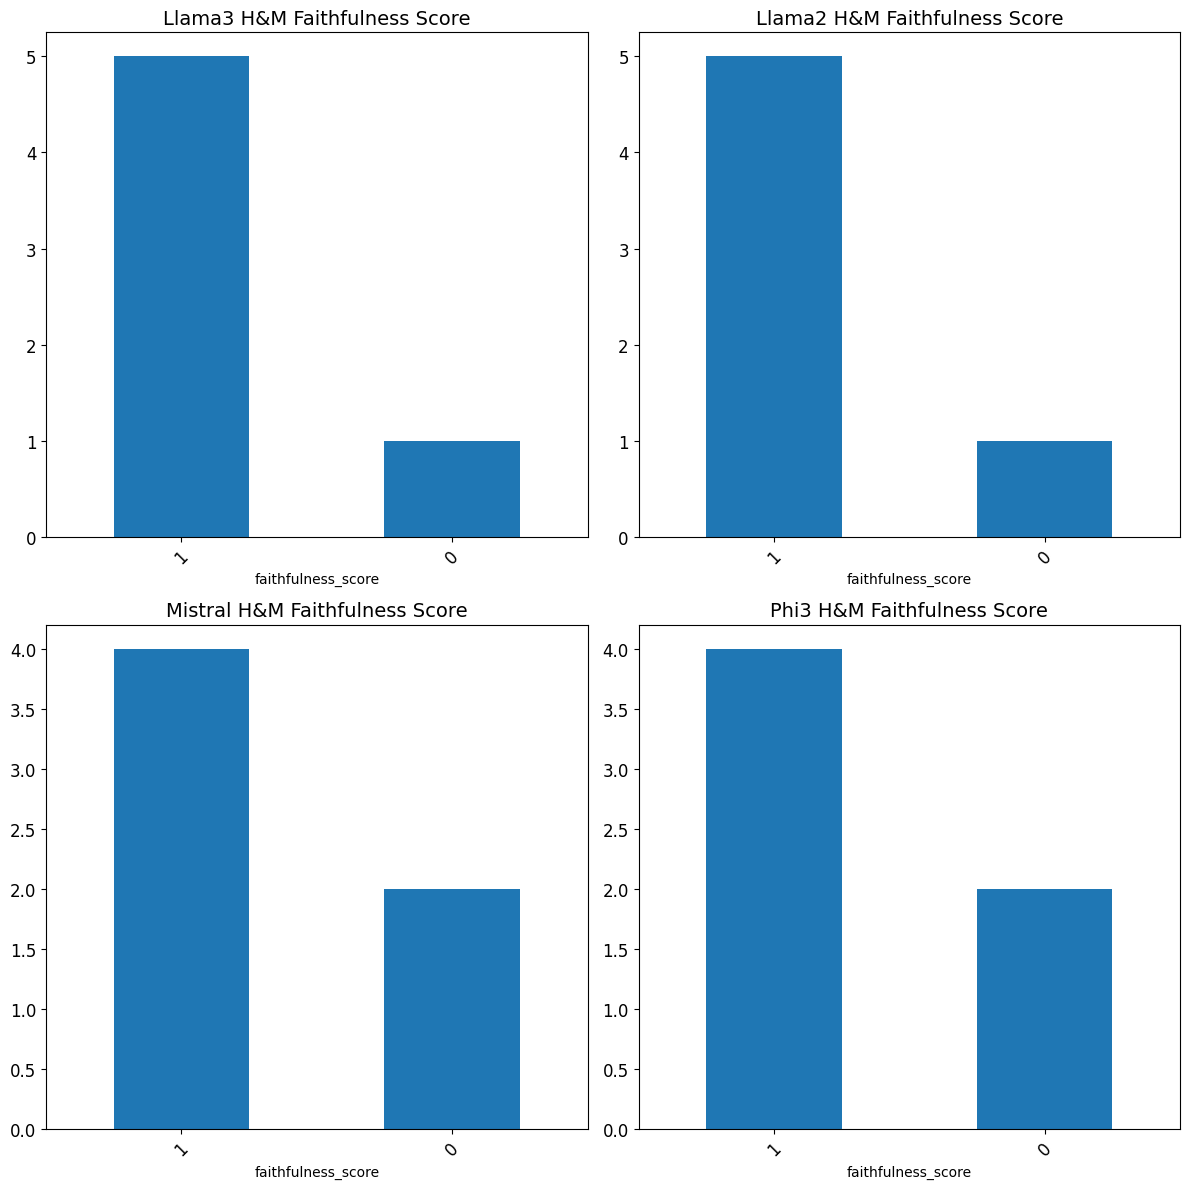

In [220]:
hm_datasets = [llama3_hm, llama2_hm, mistral_hm, phi3_hm]
hm_names = ["Llama3 H&M", "Llama2 H&M", "Mistral H&M", "Phi3 H&M"]
plot_faithfulness_scores(hm_datasets, hm_names, './faith_hm_scene_mit.png')